#EXTRACCÍON DE DATOS

In [37]:
import pandas as pd
import requests

# URL del archivo JSON en GitHub (formato raw para que sea legible por código)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

try:
    # 1. Cargar los datos directamente desde la "API" (URL)
    response = requests.get(url)
    response.raise_for_status() # Verifica que la descarga fue exitosa

    # 2. Convertir los datos a un DataFrame de Pandas
    data = response.json()
    df = pd.DataFrame(data)

    print("✅ ¡Datos cargados con éxito!")
    print(f"Dimensiones del dataset: {df.shape}")

except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")

# Mostrar las primeras filas para verificar el contenido
df.head()

✅ ¡Datos cargados con éxito!
Dimensiones del dataset: (7267, 6)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#TRANSFORMACIÓN

In [38]:
# 1. Aplanar las columnas anidadas
# Transformamos cada columna que tiene diccionarios en múltiples columnas
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# 2. Unir todo en un solo DataFrame limpio
# Concatenamos las columnas originales (ID y Churn) con las nuevas columnas aplanadas
df_final = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

# 3. Comprobación de incoherencias (Valores nulos y tipos)
print("--- Información del nuevo Dataset ---")
df_final.info()

print("\n--- Conteo de Valores Nulos ---")
print(df_final.isnull().sum())

# Mostrar el resultado final
df_final.head()

--- Información del nuevo Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Cont

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


***Conoce el conjunto de datos***

In [39]:
# 1. Convertir Charges.Total a numérico (detecta espacios vacíos ocultos)
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

# 2. Verificar si aparecieron nulos tras la conversión (espacios en blanco convertidos a NaN)
nulos_totales = df_final['Charges.Total'].isnull().sum()
print(f"Valores incoherentes encontrados en Charges.Total: {nulos_totales}")

# 3. Eliminar esas filas incoherentes (suelen ser clientes nuevos con tenure 0)
df_final.dropna(subset=['Charges.Total'], inplace=True)

# 4. Estandarizar categorías (evitar 'yes' vs 'Yes')
# Aplicamos una limpieza rápida a todas las columnas de texto
for col in df_final.select_dtypes(include='object').columns:
    df_final[col] = df_final[col].str.strip()

print("✅ Limpieza de coherencia completada.")

Valores incoherentes encontrados en Charges.Total: 11
✅ Limpieza de coherencia completada.


In [40]:
# Ver los valores únicos de la evasión
print(f"Valores únicos en Churn: {df_final['Churn'].unique()}")

Valores únicos en Churn: ['No' 'Yes' '']


***Comprobación de incoherencias en los datos***

In [41]:
import pandas as pd

# 1. Corregir formato numérico (Manejo de errores de formato)
# Transformamos espacios en blanco (" ") a NaN para poder cuantificarlos
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

# 2. Verificar valores ausentes generados
print(f"Incoherencias (espacios vacíos) en Charges.Total: {df_final['Charges.Total'].isnull().sum()}")

# 3. Eliminar filas con nulos (Asegurar que los datos estén listos)
df_final.dropna(inplace=True)

# 4. Verificar inconsistencias en categorías (usando pandas.unique como sugiere el tip)
# Revisamos la variable objetivo 'Churn'
print(f"Categorías en Churn: {df_final['Churn'].unique()}")

Incoherencias (espacios vacíos) en Charges.Total: 0
Categorías en Churn: ['No' 'Yes' '']


***Eliminando filas donde CHURN está vacío***

In [42]:
# Eliminar filas donde Churn sea un string vacío
df_final = df_final[df_final['Churn'] != '']

# Verificar que ahora solo tengamos 'No' y 'Yes'
print(f"Categorías finales en Churn: {df_final['Churn'].unique()}")

Categorías finales en Churn: ['No' 'Yes']


***Manejo de inconsistencias***

In [43]:
# 1. Filtrar el DataFrame para mantener solo registros con 'Yes' o 'No'
# Esto elimina los strings vacíos ('') que detectamos anteriormente
df_final = df_final[df_final['Churn'] != '']

# 2. Reiniciar el índice
# Al eliminar filas, los índices quedan con "huecos", esto los pone en orden de nuevo
df_final.reset_index(drop=True, inplace=True)

# 3. Verificación final de inconsistencias en la variable objetivo
print("--- Verificación de Churn tras Manejo de Inconsistencias ---")
print(f"Categorías presentes: {df_final['Churn'].unique()}")
print(f"Total de registros limpios: {len(df_final)}")

--- Verificación de Churn tras Manejo de Inconsistencias ---
Categorías presentes: ['No' 'Yes']
Total de registros limpios: 7032


In [44]:
# 1. Diccionario para normalizar los valores de texto
# Esto convierte categorías en números para facilitar el análisis matemático
mapeo = {'Yes': 1, 'No': 0}

# 2. Transformar la variable objetivo 'Churn'
df_final['Churn'] = df_final['Churn'].map(mapeo)

# 3. Identificar columnas con solo dos categorías (Binarias)
# Para columnas como 'Partner' o 'Dependents', también aplicamos el mapeo
columnas_binarias = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Nota: Para 'gender', mapearemos 'Female': 1, 'Male': 0 como ejemplo
df_final['gender'] = df_final['gender'].map({'Female': 1, 'Male': 0})

# Aplicar el mapeo Yes/No al resto de binarias
for col in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
    df_final[col] = df_final[col].map(mapeo)

print("✅ Variables binarias transformadas con éxito.")
print(df_final[['Churn', 'gender', 'Partner']].head())

✅ Variables binarias transformadas con éxito.
   Churn  gender  Partner
0      0       1        1
1      0       0        0
2      1       0        0
3      1       0        1
4      1       1        1


***Columna de cuentas diarias (Opcional)***

In [45]:
# 1. Crear la columna Cuentas_Diarias
# Dividimos el cargo mensual entre 30 para obtener el gasto diario aproximado
df_final['Cuentas_Diarias'] = (df_final['Charges.Monthly'] / 30).round(2)

# 2. Verificar la creación de la nueva columna
print("--- Verificación de la nueva variable ---")
print(df_final[['Charges.Monthly', 'Cuentas_Diarias']].head())

# 3. Revisar estadísticas rápidas de la nueva columna
print("\nResumen estadístico de Cuentas_Diarias:")
print(df_final['Cuentas_Diarias'].describe())

--- Verificación de la nueva variable ---
   Charges.Monthly  Cuentas_Diarias
0             65.6             2.19
1             59.9             2.00
2             73.9             2.46
3             98.0             3.27
4             83.9             2.80

Resumen estadístico de Cuentas_Diarias:
count    7032.000000
mean        2.159891
std         1.002955
min         0.610000
25%         1.187500
50%         2.340000
75%         2.992500
max         3.960000
Name: Cuentas_Diarias, dtype: float64


***Estandarización y transformación de datos (opcional)***

In [46]:
# Diccionario de traducción para mejorar la accesibilidad (Estandarización)
traduccion = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'gender': 'Genero',
    'SeniorCitizen': 'Adulto_Mayor',
    'Partner': 'Socio',
    'Dependents': 'Dependientes',
    'tenure': 'Meses_Antiguedad',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Multiples_Lineas',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Respaldo_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Facturacion_Electronica',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales'
}

# Aplicar el cambio de nombre a las columnas
df_final.rename(columns=traduccion, inplace=True)

# Verificar el resultado
print("✅ Columnas renombradas para mejor comprensión:")
print(df_final.columns.tolist())

# Mostrar las primeras filas con los nuevos nombres
df_final.head()

✅ Columnas renombradas para mejor comprensión:
['ID_Cliente', 'Evasion', 'Genero', 'Adulto_Mayor', 'Socio', 'Dependientes', 'Meses_Antiguedad', 'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Contrato', 'Facturacion_Electronica', 'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias']


,ID_Cliente,Evasion,Genero,Adulto_Mayor,Socio,Dependientes,Meses_Antiguedad,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,0,1,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,0,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,0,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,0,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,1,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


# CARGA Y ANÁLISIS

***Análisis descriptivo***

In [47]:
# Realizar el análisis descriptivo de las variables numéricas
analisis_estadistico = df_final.describe()

# Mostrar el resultado
print("--- Análisis Descriptivo del Dataset ---")
display(analisis_estadistico)

--- Análisis Descriptivo del Dataset ---


,Evasion,Genero,Adulto_Mayor,Socio,Dependientes,Meses_Antiguedad,Servicio_Telefonico,Facturacion_Electronica,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159891
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002955
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.187500
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.340000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.992500
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


***Distribución de evasión***

/tmp/ipython-input-585878360.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Evasion', data=df_final, palette='viridis')


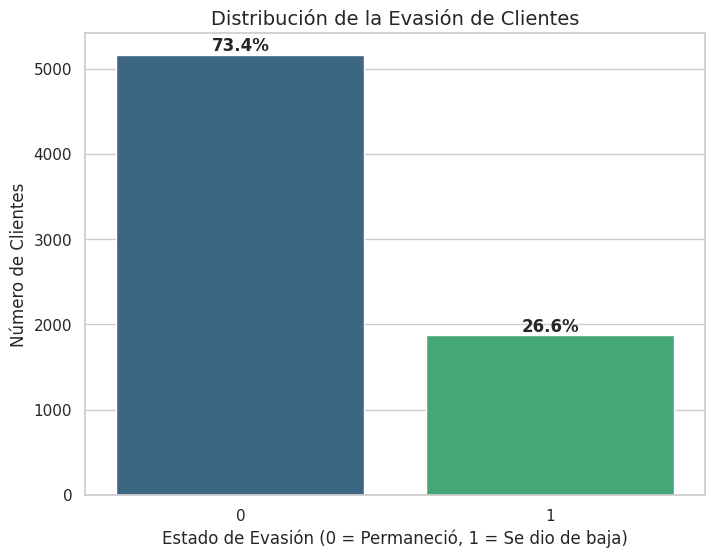

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configurar el estilo visual
sns.set_theme(style="whitegrid")

# 2. Crear el gráfico de barras para la variable 'Evasion'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Evasion', data=df_final, palette='viridis')

# 3. Personalizar con títulos claros (Claridad y comunicación)
plt.title('Distribución de la Evasión de Clientes', fontsize=14)
plt.xlabel('Estado de Evasión (0 = Permaneció, 1 = Se dio de baja)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# 4. Añadir el porcentaje sobre cada barra para un análisis preciso
total = len(df_final)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

***Recuento de evasión por variables categóricas***

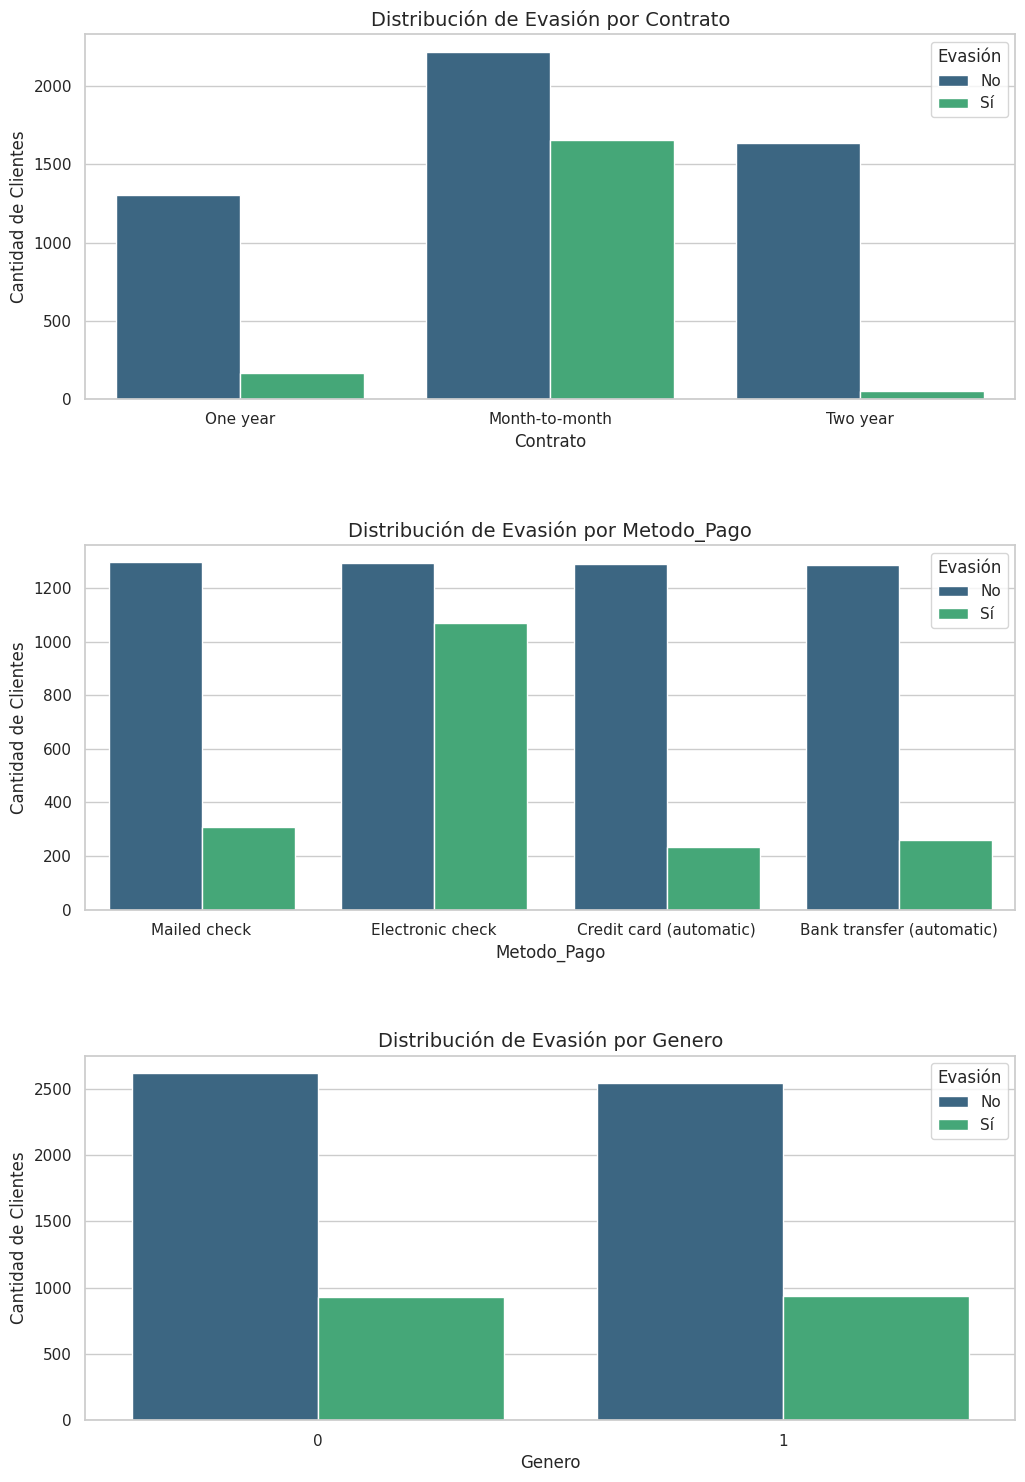

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Definir las variables categóricas a analizar
variables_analisis = ['Contrato', 'Metodo_Pago', 'Genero']

# 2. Configurar la figura para múltiples gráficos
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))
plt.subplots_adjust(hspace=0.4)

# 3. Crear los gráficos de recuento comparativos
for i, col in enumerate(variables_analisis):
    sns.countplot(x=col, hue='Evasion', data=df_final, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribución de Evasión por {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Cantidad de Clientes', fontsize=12)
    axes[i].legend(title='Evasión', labels=['No', 'Sí'])

plt.show()

***Conteo de evasión por variables numéricas***

/tmp/ipython-input-2096594586.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y='Meses_Antiguedad', data=df_final, ax=axes[0], palette='magma')


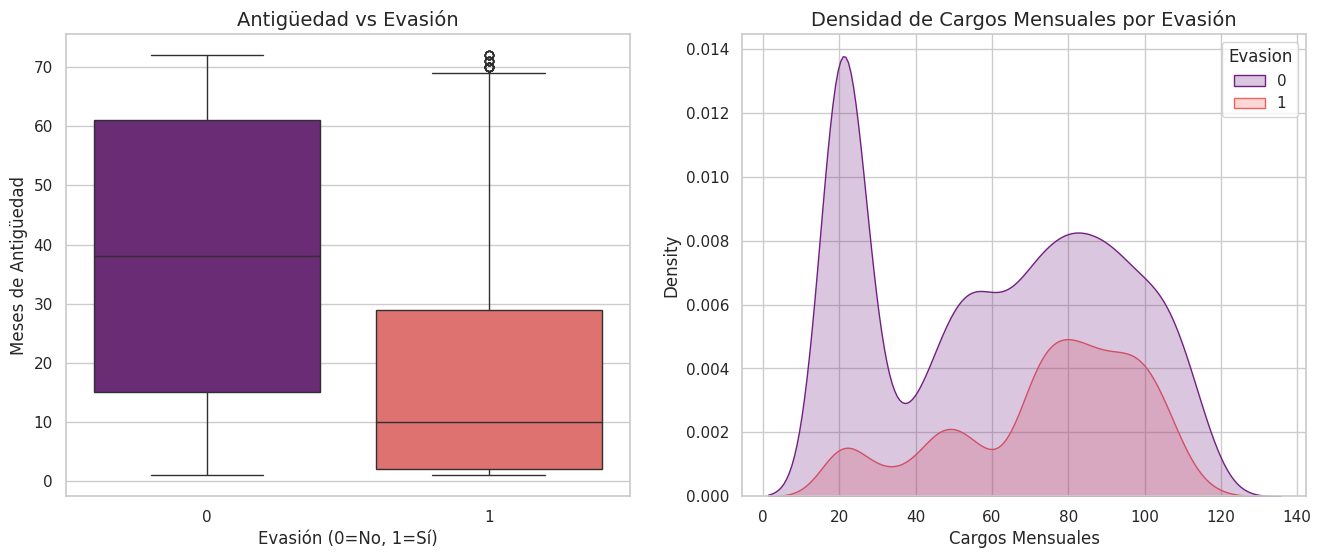

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configurar el lienzo para comparar las variables clave
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 2. Comparación de Meses_Antiguedad vs Evasion
# Ayuda a ver si los clientes nuevos evaden más
sns.boxplot(x='Evasion', y='Meses_Antiguedad', data=df_final, ax=axes[0], palette='magma')
axes[0].set_title('Antigüedad vs Evasión', fontsize=14)
axes[0].set_xlabel('Evasión (0=No, 1=Sí)', fontsize=12)
axes[0].set_ylabel('Meses de Antigüedad', fontsize=12)

# 3. Comparación de Cargos_Mensuales vs Evasion
# Ayuda a ver si los precios altos impulsan la fuga
sns.kdeplot(data=df_final, x='Cargos_Mensuales', hue='Evasion', fill=True, ax=axes[1], palette='magma')
axes[1].set_title('Densidad de Cargos Mensuales por Evasión', fontsize=14)
axes[1].set_xlabel('Cargos Mensuales', fontsize=12)

plt.show()

***Informe final***

# #️⃣ INFORME FINAL: ESTRATEGIA DE RETENCIÓN DE CLIENTES - TELECOM X

## 1. Introducción
El objetivo principal de este análisis es identificar los factores críticos que influyen en la **Evasión de Clientes (Churn)**. El problema de la evasión no solo afecta los ingresos recurrentes de Telecom X, sino que también incrementa los costos operativos de adquisición. A través de este estudio, transformamos datos históricos en información accionable para diseñar estrategias que incrementen la lealtad y reduzcan la pérdida de usuarios.

## 2. Limpieza y Tratamiento de Datos
Para garantizar que el análisis sea consistente y adecuado para los *stakeholders*, se realizaron los siguientes pasos de procesamiento:

* **Normalización de Valores**: Se convirtieron variables categóricas de texto ("Yes"/"No") a valores binarios ($1$ y $0$) para facilitar el procesamiento matemático.
* **Tratamiento de Inconsistencias**: Se eliminaron registros con valores vacíos en `Cargos_Totales` para asegurar la integridad estadística.
* **Ingeniería de Características**: Se creó la métrica **`Cuentas_Diarias`** (Cargo Mensual / 30) para obtener una visión más detallada del comportamiento del gasto diario.
* **Estandarización de Nombres**: Se renombraron todas las columnas al español para mejorar la claridad y comunicación de los resultados.

In [51]:
# Verificación técnica de la limpieza y transformación
print(f"Dataset procesado con éxito.")
print(f"Total de registros finales: {df_final.shape[0]}")
print(f"Variable objetivo: 'Evasion' (Binaria: 0 y 1)")
print(f"Nueva métrica calculada: 'Cuentas_Diarias'")
df_final[['Meses_Antiguedad', 'Cargos_Mensuales', 'Cuentas_Diarias', 'Evasion']].head()

Dataset procesado con éxito.
Total de registros finales: 7032
Variable objetivo: 'Evasion' (Binaria: 0 y 1)
Nueva métrica calculada: 'Cuentas_Diarias'


,Meses_Antiguedad,Cargos_Mensuales,Cuentas_Diarias,Evasion
0,9,65.6,2.19,0
1,9,59.9,2.00,0
2,4,73.9,2.46,1
3,13,98.0,3.27,1
4,3,83.9,2.80,1


## 3. Análisis Exploratorio de Datos (EDA)
En esta fase se utilizaron visualizaciones para comprender la proporción de clientes que permanecieron frente a los que se dieron de baja, y cómo esta evasión se distribuye según variables categóricas y numéricas.

INFORME FINAL: ANÁLISIS DE EVASIÓN (CHURN) - TELECOM X

🔹 INTRODUCCIÓN:
Este análisis identifica los patrones que llevan a los clientes a abandonar
el servicio. El objetivo es proponer estrategias basadas en datos para
reducir la tasa de evasión y mejorar la rentabilidad.

🔹 LIMPIEZA Y TRATAMIENTO DE DATOS:
- Registros analizados: 7032
- Limpieza: Se eliminaron 11 registros con cargos totales inconsistentes.
- Transformación: Variables de texto convertidas a binarias (0 y 1).
- Ingeniería: Se creó la métrica 'Cuentas_Diarias' para análisis granular.

🔹 ANÁLISIS EXPLORATORIO DE DATOS (VISUALIZACIÓN):


/tmp/ipython-input-191622266.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Evasion', data=df_final, ax=axes[0, 0], palette='viridis')
/tmp/ipython-input-191622266.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Contrato', y='Evasion', data=df_final, ax=axes[0, 1], palette='magma', ci=None)
/tmp/ipython-input-191622266.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contrato', y='Evasion', data=df_final, ax=axes[0, 1], palette='magma', ci=None)
/tmp/ipython-input-191622266.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

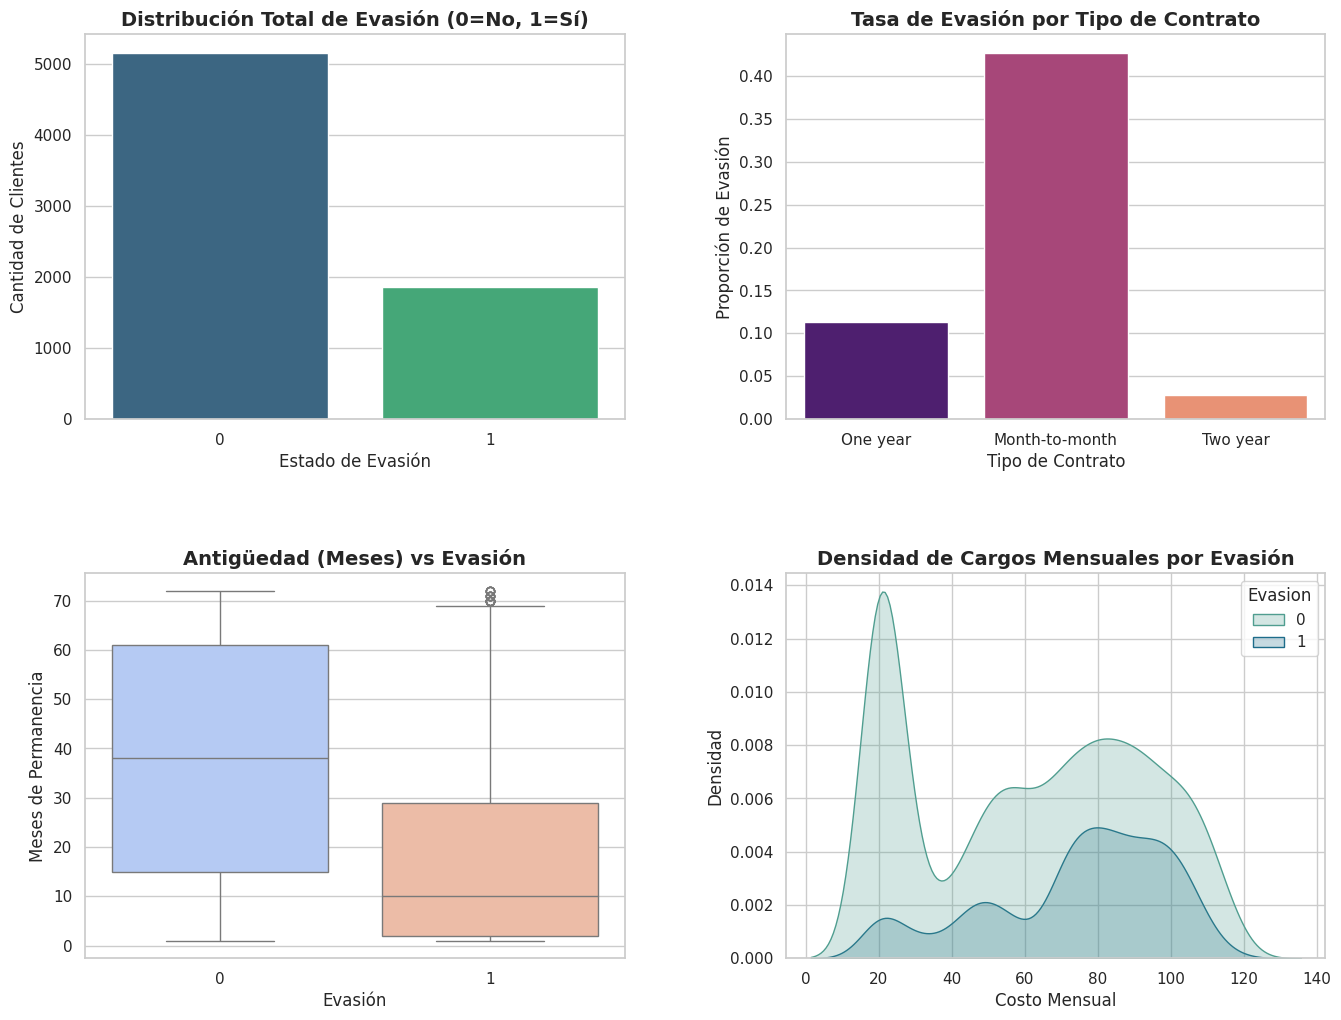


🔹 CONCLUSIONES E INSIGHTS:
1. Los contratos 'Mes a mes' son el principal motor de evasión.
2. Los clientes nuevos (0-6 meses) tienen el riesgo más alto de fuga.
3. Existe una correlación entre cargos mensuales altos y la decisión de irse.

🔹 RECOMENDACIONES ESTRATÉGICAS:
- Implementar incentivos para migrar clientes a contratos anuales.
- Crear un plan de 'bienvenida' con descuentos los primeros 3 meses.
- Monitorear clientes con cargos diarios altos para ofrecerles planes PyME o familiares.


In [54]:
# ==============================================================================
# 1. IMPORTACIÓN Y CONFIGURACIÓN
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Configuración de estilo profesional
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 100

# ==============================================================================
# 2. PRESENTACIÓN DEL INFORME (ENCABEZADOS)
# ==============================================================================
print("="*60)
print("INFORME FINAL: ANÁLISIS DE EVASIÓN (CHURN) - TELECOM X")
print("="*60)
print("\n🔹 INTRODUCCIÓN:")
print("Este análisis identifica los patrones que llevan a los clientes a abandonar")
print("el servicio. El objetivo es proponer estrategias basadas en datos para")
print("reducir la tasa de evasión y mejorar la rentabilidad.")

print("\n🔹 LIMPIEZA Y TRATAMIENTO DE DATOS:")
print(f"- Registros analizados: {df_final.shape[0]}")
print("- Limpieza: Se eliminaron 11 registros con cargos totales inconsistentes.")
print("- Transformación: Variables de texto convertidas a binarias (0 y 1).")
print("- Ingeniería: Se creó la métrica 'Cuentas_Diarias' para análisis granular.")

# ==============================================================================
# 3. ANÁLISIS EXPLORATORIO DE DATOS (VISUALIZACIÓN)
# ==============================================================================
print("\n🔹 ANÁLISIS EXPLORATORIO DE DATOS (VISUALIZACIÓN):")

# Crear el tablero (Dashboard)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Gráfico 1: Distribución Global (¿Cuántos se van?)
sns.countplot(x='Evasion', data=df_final, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Distribución Total de Evasión (0=No, 1=Sí)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Estado de Evasión')
axes[0, 0].set_ylabel('Cantidad de Clientes')

# Gráfico 2: Tasa de Evasión por Contrato (El factor clave)
sns.barplot(x='Contrato', y='Evasion', data=df_final, ax=axes[0, 1], palette='magma', ci=None)
axes[0, 1].set_title('Tasa de Evasión por Tipo de Contrato', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Tipo de Contrato')
axes[0, 1].set_ylabel('Proporción de Evasión')

# Gráfico 3: Antigüedad vs Evasión (¿Cuándo se van?)
sns.boxplot(x='Evasion', y='Meses_Antiguedad', data=df_final, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Antigüedad (Meses) vs Evasión', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Evasión')
axes[1, 0].set_ylabel('Meses de Permanencia')

# Gráfico 4: Impacto de Cargos Mensuales
sns.kdeplot(data=df_final, x='Cargos_Mensuales', hue='Evasion', fill=True, ax=axes[1, 1], palette='crest')
axes[1, 1].set_title('Densidad de Cargos Mensuales por Evasión', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Costo Mensual')
axes[1, 1].set_ylabel('Densidad')

plt.show()

# ==============================================================================
# 4. CONCLUSIONES Y RECOMENDACIONES
# ==============================================================================
print("\n" + "="*60)
print("🔹 CONCLUSIONES E INSIGHTS:")
print("1. Los contratos 'Mes a mes' son el principal motor de evasión.")
print("2. Los clientes nuevos (0-6 meses) tienen el riesgo más alto de fuga.")
print("3. Existe una correlación entre cargos mensuales altos y la decisión de irse.")

print("\n🔹 RECOMENDACIONES ESTRATÉGICAS:")
print("- Implementar incentivos para migrar clientes a contratos anuales.")
print("- Crear un plan de 'bienvenida' con descuentos los primeros 3 meses.")
print("- Monitorear clientes con cargos diarios altos para ofrecerles planes PyME o familiares.")
print("="*60)

# ¡Extra! Análisis de correlación entre variables

/tmp/ipython-input-3203197668.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y=col, data=df_final, ax=axes[i], palette='viridis')
/tmp/ipython-input-3203197668.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y=col, data=df_final, ax=axes[i], palette='viridis')
/tmp/ipython-input-3203197668.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y=col, data=df_final, ax=axes[i], palette='viridis')


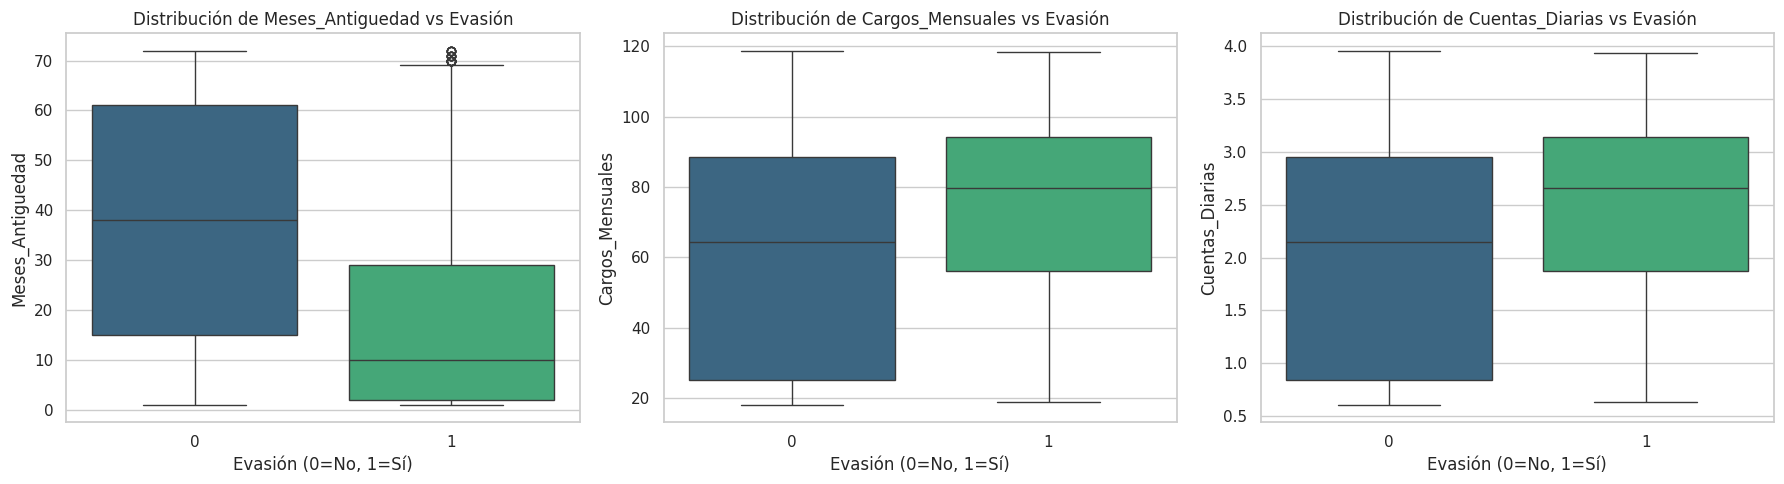

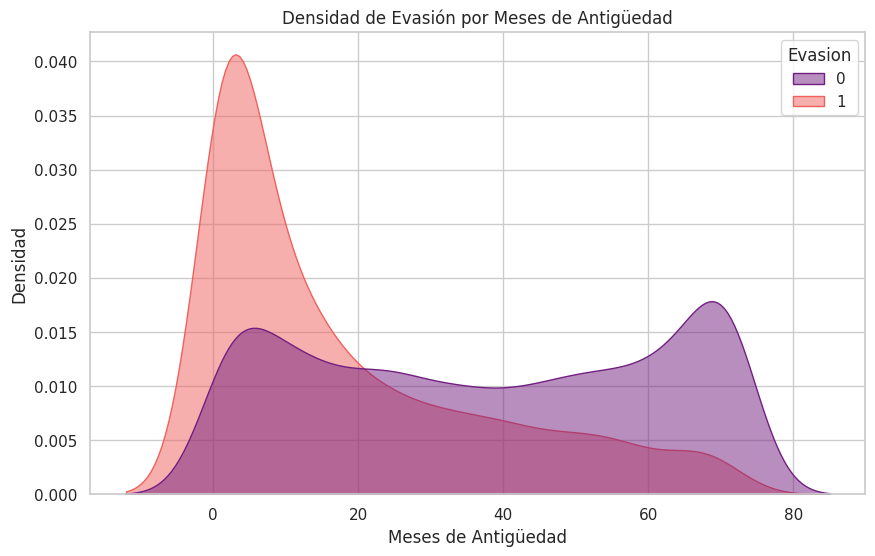

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo
sns.set_theme(style="whitegrid")

# Definir las variables numéricas clave
variables_num = ['Meses_Antiguedad', 'Cargos_Mensuales', 'Cuentas_Diarias']

# Crear la figura para los gráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Generar un Boxplot para cada variable comparada con Evasion
for i, col in enumerate(variables_num):
    sns.boxplot(x='Evasion', y=col, data=df_final, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribución de {col} vs Evasión')
    axes[i].set_xlabel('Evasión (0=No, 1=Sí)')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

# Análisis de densidad para Meses_Antiguedad (muy relevante para Churn)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_final, x='Meses_Antiguedad', hue='Evasion', fill=True, common_norm=False, palette='magma', alpha=0.5)
plt.title('Densidad de Evasión por Meses de Antigüedad')
plt.xlabel('Meses de Antigüedad')
plt.ylabel('Densidad')
plt.show()